In [2]:
from manim import *
from manim_mobject_svg import *
config.media_embed = True
param= "-v WARNING  --progress_bar None --format=gif  -r  500,200  --disable_caching Example"
# param= "-v WARNING  --progress_bar None   -r  500,200 --fps=23 --disable_caching Example"
stix2 = TexTemplate()
stix2.add_to_preamble(r"\usepackage{stix2}", prepend= True)
def TexS(*tex_strings, **kwargs):
    return Tex(*tex_strings, tex_template=stix2,  **kwargs)
def MathTexS(*tex_strings, **kwargs):
    return MathTex(*tex_strings,tex_template=stix2, **kwargs)


Manim Community v0.17.2

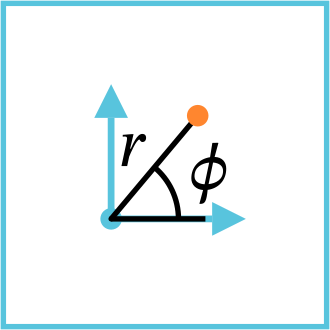

In [3]:
#| label: polar_static

g = VGroup(Square().scale(1.2))
g.set_color(BLUE)
coordinate_system = VGroup(Dot([0,0,0]),Arrow(ORIGIN, 1*UP, buff=0), Arrow(ORIGIN, 1*RIGHT, buff=0 )).shift((DOWN+LEFT)*0.4)
coordinate_system.set_color(BLUE)

CENTER_POLAR = coordinate_system.submobjects[0].get_center()
small_dot = Dot(color=BLACK, point=CENTER_POLAR, radius=0.02) 
line1 = Line(CENTER_POLAR,CENTER_POLAR+ 0.7*RIGHT).set_color(BLACK)

def make_moving_objects(rr, tt):
    moving_line = Line(CENTER_POLAR,CENTER_POLAR+ rr * UP).set_color(BLACK).rotate(-tt * DEGREES, about_point=CENTER_POLAR)
    do = Dot(moving_line.get_end(), color=ORANGE , z_index=10)
    rval= MathTexS("r" , color=BLACK)
    rval.move_to(moving_line.get_center()+moving_line.copy().rotate(PI / 2).get_unit_vector()*0.2)
    a = Angle(line1, moving_line, radius=0.5, other_angle=False , color=BLACK)
    te = MathTexS(r"\phi",  color=BLACK).move_to(
        Angle(
            line1, moving_line, radius=0.5 + 3 * SMALL_BUFF, other_angle=False 
        ).point_from_proportion(0.5)
    )
    return moving_line,do, rval,  a, te

moving_line,do, rval,  a, te = make_moving_objects(1, 40)


g += VGroup(coordinate_system,small_dot,line1)
g += VGroup(moving_line,do, rval,  a, te)
g

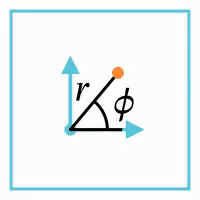

In [5]:
#| label: polar_ani1
class BBB(ZoomedScene):
    def construct(self):

        def my_upd(mob):
            moving_line,do, rval,  a, te = make_moving_objects(r_tracker.get_value(),theta_tracker.get_value())
            z = VGroup(moving_line,do,rval,a,te)
            mob.become(z)
        gx = g.copy()
        self.camera.frame.width = gx.width + 3 * SMALL_BUFF
        self.add(gx)
        moving_objects = gx[2]
        self.camera.background_color =WHITE
        r_tracker= ValueTracker(1)
        theta_tracker = ValueTracker(40)
        self.wait(0.1)
        
        moving_objects.add_updater( my_upd)

        self.play(theta_tracker.animate.set_value(-10), run_time = 0.6)
        self.play(theta_tracker.animate.set_value(40), run_time = 0.6)

%manim  -v WARNING -ql -r 200,200 --progress_bar None --format=GIF  --disable_caching BBB

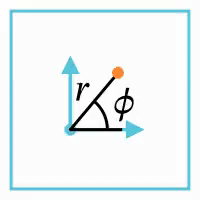

In [6]:
#| label: polar_ani2
class BBB(ZoomedScene):
    def construct(self):
        def my_upd(mob):
            moving_line,do, rval,  a, te = make_moving_objects(r_tracker.get_value(),theta_tracker.get_value())
            z = VGroup(moving_line,do,rval,a,te)
            mob.become(z)
        gx = g.copy()
        self.camera.frame.width = gx.width + 3 * SMALL_BUFF
        self.add(gx)
        moving_objects = gx[2]
        self.camera.background_color =WHITE
        r_tracker= ValueTracker(1)
        theta_tracker = ValueTracker(40)
        self.wait(0.1)

        moving_objects.add_updater( my_upd)

        self.play(r_tracker.animate.set_value(1.4), run_time= 0.6)
        self.play(r_tracker.animate.set_value(1), run_time= 0.6)

%manim  -v WARNING -ql -r 200,200 --progress_bar None --format=GIF  --disable_caching BBB